In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
from keras import models, layers
from keras.datasets import boston_housing
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
print("Train: {}".format(train_data.shape))
print("Test: {}".format(test_data.shape))

Train: (404, 13)
Test: (102, 13)


In [5]:
# Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [8]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [13]:
# K-fold validation
k = 4
num_val_samples = len(train_data) // k
all_mae_histories = []
for i in range(k):
    print('processing fold #{}'.format(i))
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]], 
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], 
         train_targets[(i+1) * num_val_samples:]], 
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, 
              validation_data=(val_data, val_targets), 
              epochs=500, batch_size=1, verbose=0)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(500)]

processing fold #0
processing fold #1
processing fold #2
processing fold #3


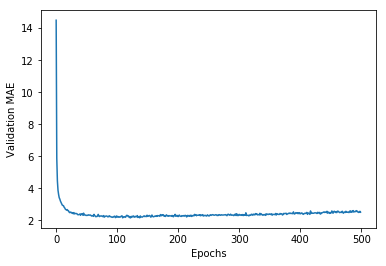

In [15]:
plt.plot(range(500), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

In [17]:
# Training the final model
model = build_model()
model.fit(train_data, train_targets, epochs=300, batch_size=1, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("MAE score: {}".format(test_mae_score))
print("MSE score: {}".format(test_mse_score))

 32/102 [========>.....................] - ETA: 0sMAE score: 2.5929532518573835
MSE score: 16.015595828785617
